In [2]:
import pandas as pd
import numpy as np
import statistics

data = pd.read_csv("pca_data.csv")
print(data)

data = data.values.tolist()
print(data)

  features  example 1  example 2  example3  example 4
0        x          4          8        13          7
1        y         11          4         5         14
[['x', 4, 8, 13, 7], ['y', 11, 4, 5, 14]]


In [6]:
# calculating samples and features

features = 0
f1 = []
f2 = []
for i in data:
    features += 1
print("Features: ", features)

f1 = [*data[0]]; print(f1)
f2 = [*data[1]]; print(f2)

samples = len(f1)-1
print("Samples: ", samples)

Features:  2
['x', 4, 8, 13, 7]
['y', 11, 4, 5, 14]
Samples:  4


In [12]:
# mean of feature X:

meanX = sum([int(i) for i in f1 if type(i)== int])/samples
print("Mean of X: ", meanX)

meanY = sum([int(i) for i in f2 if type(i)== int])/samples
print("Meand of Y: ", meanY)

Mean of X:  8.0
Meand of Y:  8.5


In [18]:
# Covariance matrix

covMatrix = []
covMatrix.append(data[0][1:])
covMatrix.append(data[1][1:])
print(covMatrix)

cov = np.cov(covMatrix)
print("Co Variance Matrix: \n", cov)

[[4, 8, 13, 7], [11, 4, 5, 14]]
Co Variance Matrix: 
 [[ 14. -11.]
 [-11.  23.]]


In [22]:
# Eigen Values:

eigen_value = np.linalg.eig(cov)
print("Eigen Values: \n", eigen_value)

Eigen Values: 
 (array([ 6.61513568, 30.38486432]), array([[-0.83025082,  0.55738997],
       [-0.55738997, -0.83025082]]))


In [24]:
# Eigen Vectors:

from numpy.linalg import eig

oned_eigen_value = eigen_value[0]

e1 = eigen_value[1][0][::-1]
e2 = -eigen_value[1][1]

print(oned_eigen_value)
print("E1: ", e1)
print("E2: ", e2)

[ 6.61513568 30.38486432]
E1:  [ 0.55738997 -0.83025082]
E2:  [0.55738997 0.83025082]


In [25]:
# Normalized Eigen Vector

norm_eigen_vector = e2/np.linalg.norm(e2)
print("Normalized Eigen Vector: ", norm_eigen_vector)

Normalized Eigen Vector:  [0.55738997 0.83025082]


In [29]:
bd = []

for i in range(len(c[0])):
    bd.append(0)

for i in range(len(bd)):
    a = np.matmul(e1, [[c[0][i] - meanX], [c[1][i] - meanY]])
    bd[i] = a[0]
    print(bd)

[-4.3051869226747055, 0, 0, 0]
[-4.3051869226747055, 3.73612868661133, 0, 0]
[-4.3051869226747055, 3.73612868661133, 5.692827710560993, 0]
[-4.3051869226747055, 3.73612868661133, 5.692827710560993, -5.1237694744976165]


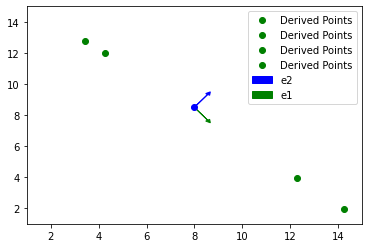

In [42]:
# Ploting E1 and E2 and Derived Points:

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(meanX, meanY, "bo")

ax.arrow(meanX, meanY, e1[0], e2[1], head_width=0.2, head_length=0.2, fc="blue", ec="blue", label="e2")
ax.arrow(meanX, meanY, e2[0], e1[1], head_width=0.2, head_length=0.2, fc="green", ec="green", label="e1")

for i in bd:
    ax.plot(meanX + e2[0] + i, meanY + e1[1] - i, 'go', label="Derived Points")

ax.set_xlim(1, 15)
ax.set_ylim(1, 15)
ax.legend()
plt.show()